In [ ]:
import pandas as pd
from audioio import load_audio
import numpy as np


pos_path = r"C:\Users\aksel\Documents\Code\EthoGraph\data\Philodoptera\exported_labels.csv"

df = pd.read_csv(pos_path)
sr_vid = 240
start_idx = 306 * 2


audio_path = r"C:\Users\aksel\Documents\Code\EthoGraph\data\Philodoptera\audio.wav"


audio, sr = load_audio(audio_path)
audio = audio[:322297, :] # first 7.308333333333334sec


x = df["x"].values
y = df["y"].values

# replace 0 with NaN in x and y
x[x == 0] = np.nan 
y[y == 0] = np.nan

xl = x[::2]
xr = x[1::2]


yl = y[::2]
yr = y[1::2]




mid_x = np.mean(x[start_idx:start_idx+10])
mid_y = np.mean(y[start_idx:start_idx+10])


x_centered = x - mid_x
vx = np.gradient(x_centered, 1/sr_vid)

vxl = vx[::2]
vxr = vx[1::2]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.plot(xl[start_idx:]- mid_x, yl[start_idx:]- mid_y, label="xy_l")
plt.plot(xr[start_idx:]- mid_x, yr[start_idx:]- mid_y, label="xy_r")

In [105]:
envelope.shape

(14617,)

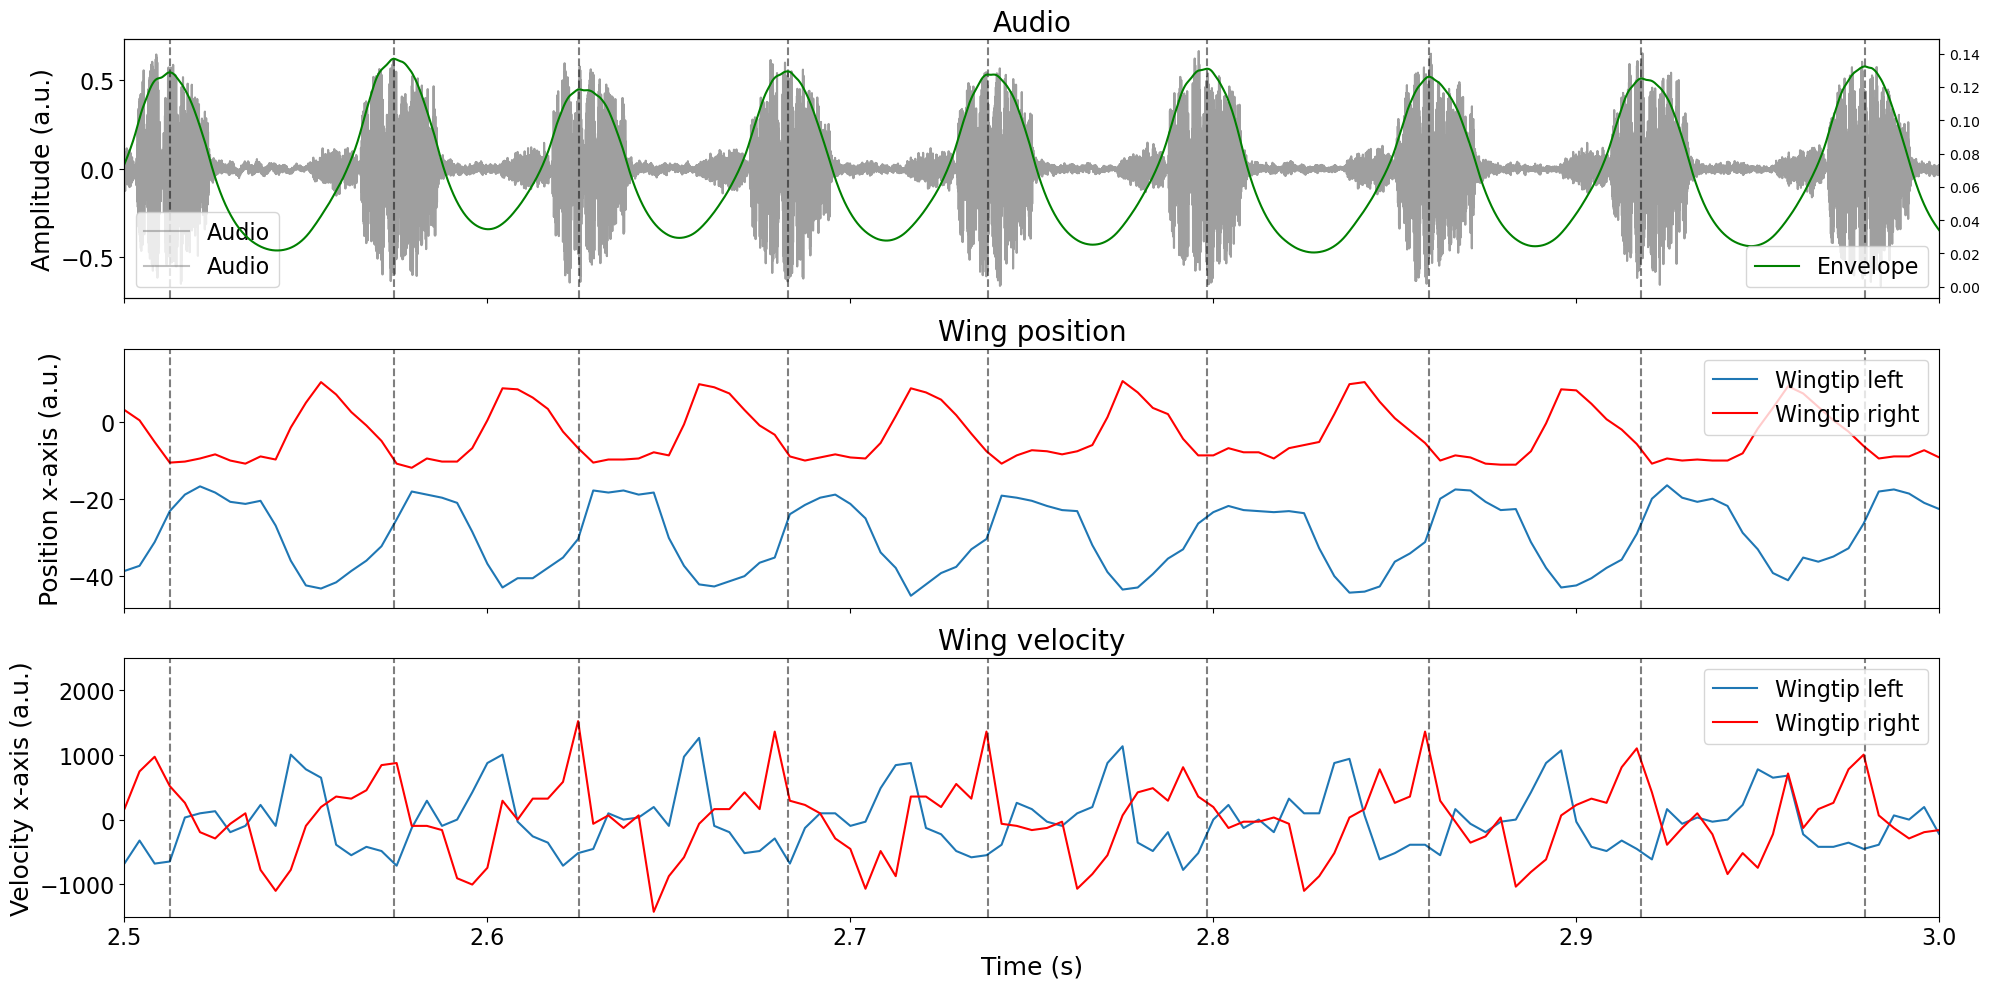

In [126]:
from scipy.signal import find_peaks, resample
from thunderhopper.model import extract_env

# Find peaks in audio with minimum distance of 100ms

envelope = extract_env(audio[:, 0], rate=sr, env_fcut=20)

# resample envelope to audio
envelope = resample(envelope, len(audio))

min_distance_samples = int(0.05 * sr)  # 100ms in samples
peaks, _ = find_peaks(envelope, distance=min_distance_samples)

# Convert peak indices to time
peak_times = peaks / sr

# Plot as before
time_pos = np.arange(len(xl)) / sr_vid
time_audio = np.arange(len(audio)) / sr

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

axs[0].plot(time_audio, audio, label="Audio", color='grey', alpha=0.5)
ax2 = plt.twinx(axs[0])
ax2.plot(time_audio, envelope, label="Envelope", color='green')

for pt in peak_times:
    axs[0].axvline(pt, color='k', linestyle='--', alpha=0.5)

axs[0].set_ylabel("Amplitude (a.u.)")
axs[0].legend()
ax2.legend()
axs[0].set_title("Audio")

axs[1].plot(time_pos, xl - mid_x, label="Wingtip left")
axs[1].plot(time_pos, xr - mid_x, label="Wingtip right", color='red')
for pt in peak_times:
    axs[1].axvline(pt, color='k', linestyle='--', alpha=0.5)
axs[1].set_ylabel("Position x-axis (a.u.)")
axs[1].legend(loc="upper right")
axs[1].set_title("Wing position")

axs[2].plot(time_pos, vxl, label="Wingtip left")
axs[2].plot(time_pos, vxr, label="Wingtip right", color='red')
for pt in peak_times:
    axs[2].axvline(pt, color='k', linestyle='--', alpha=0.5)
axs[2].set_ylabel("Velocity x-axis (a.u.)")
axs[2].set_title("Wing velocity")
axs[2].set_ylim(-1500, 2500)
axs[2].set_xlabel("Time (s)")

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
axs[0].legend(fontsize=16)
ax2.legend(fontsize=16)
axs[1].legend(fontsize=16, loc="upper right")
axs[2].legend(fontsize=16, loc="upper right")


plt.xlim(2.5, 3)
plt.tight_layout()

In [28]:
df

,frame,y,x
0,0,0.000000,0.000000
1,0,0.000000,0.000000
2,1,0.000000,0.000000
3,1,0.000000,0.000000
4,2,0.000000,0.000000
...,...,...,...
1749,876,338.814572,149.514238
1750,877,334.499763,136.569809
1751,877,340.162950,150.053589
1752,878,335.039114,135.760782


In [10]:
len(df) / sr_vid

4.758333333333334

In [6]:
audio.shape[0] / sr

27.672925170068027

In [ ]:
from matplotlib import pyplot as plt


from movement import sample_data
from movement.plots import plot_centroid_trajectory
from movement.utils.vector import compute_norm